In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

import string
from nltk.corpus import stopwords    
from bs4 import BeautifulSoup

from keras.preprocessing import text,sequence
import re,string,unicodedata

<a id='load_data'></a>
# Loading the data 

In [2]:
real = pd.read_csv('../input/fake-and-real-news-dataset/True.csv')
fake = pd.read_csv('../input/fake-and-real-news-dataset/Fake.csv')

In [3]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
#create a target column of 0 or 1 if the new is fake or real 
real['Label']=0
fake['Label']=1

#Using conactenate function of pandas :
data=pd.concat([real,fake])
data.sample(5)



,title,text,subject,date,Label
13205,Houthi radio station says ex-president Saleh k...,DUBAI (Reuters) - The radio station of Yemen s...,worldnews,"December 4, 2017",0
10216,Brill to step down from U.S. Federal Trade Com...,WASHINGTON (Reuters) - One of the commissioner...,politicsNews,"March 22, 2016",0
16748,SENATOR MIKE LEE Nails It On Why The Senate Op...,Senator Mike Lee gives it right back to FOX s ...,Government News,"Feb 24, 2016",1
9989,MUST WATCH: Louisiana Patriots Go Wild in Supp...,The crowd went wild when President Trump and t...,politics,"Sep 3, 2017",1
5319,WATCH: Michelle Obama DESTROYS Donald Trump W...,First Lady Michelle Obama brought the house do...,News,"July 26, 2016",1


In [6]:
#check the shape of data
np.shape(data)

(44898, 5)

In [7]:
#check for null values --> no null values found!
data.isnull().sum()

title      0
text       0
subject    0
date       0
Label      0
dtype: int64

<a id='visualize_data'></a>
## Visualizing the data 

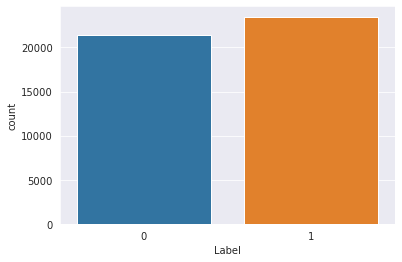

In [8]:
#How many of the given news are fake and how many of them are real?
sns.countplot(data.Label)

In [9]:
#how many unqiue titles are there. Are any of the titles repeated?
data.title.count()

44898

How many subjects are there ? We can see that using value_counts()

In [10]:
data.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

[Text(0, 0, 'politicsNews'),
 Text(0, 0, 'worldnews'),
 Text(0, 0, 'News'),
 Text(0, 0, 'politics'),
 Text(0, 0, 'Government News'),
 Text(0, 0, 'left-news'),
 Text(0, 0, 'US_News'),
 Text(0, 0, 'Middle-east')]

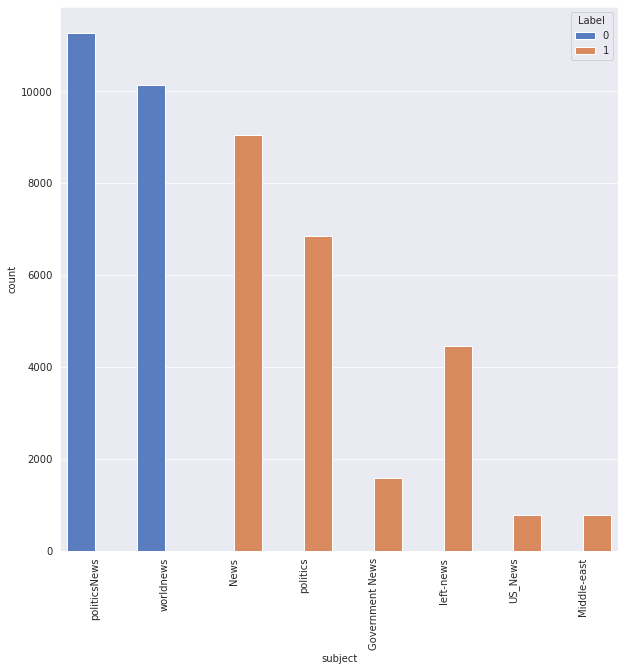

In [11]:
plt.figure(figsize=(10,10))
chart=sns.countplot(x='subject',hue='Label',data=data,palette='muted')
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,fontsize=10)

![](http://)Now we will place all of the required columns in one and delete all the not-so-required columns.

In [12]:

X = data['text']+ " " + data['title']
Y = data['Label']
print(X)
print(Y)

0        WASHINGTON (Reuters) - The head of a conservat...
1        WASHINGTON (Reuters) - Transgender people will...
2        WASHINGTON (Reuters) - The special counsel inv...
3        WASHINGTON (Reuters) - Trump campaign adviser ...
4        SEATTLE/WASHINGTON (Reuters) - President Donal...
                               ...                        
23476    21st Century Wire says As 21WIRE reported earl...
23477    21st Century Wire says It s a familiar theme. ...
23478    Patrick Henningsen  21st Century WireRemember ...
23479    21st Century Wire says Al Jazeera America will...
23480    21st Century Wire says As 21WIRE predicted in ...
Length: 44898, dtype: object
0        0
1        0
2        0
3        0
4        0
        ..
23476    1
23477    1
23478    1
23479    1
23480    1
Name: Label, Length: 44898, dtype: int64


<a id='clean_data'></a>
## Cleaning the data

We will be removing punctuation , stopwords,URLS, html tags from our text data. <br>
For this we shall use beautifulsoup and re library which we imported earlier.

In [13]:
stop_words=set(stopwords.words('english'))
punctuation=list(string.punctuation)
stop_words.update(punctuation)

def clean_text_data(text):
    text = BeautifulSoup(text,"html.parser").get_text()
    text = re.sub('\[[^]]*\]','',text)
    text = re.sub(r'http\S+','',text)
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop_words:
            final_text.append(i.strip())
    return " ".join(final_text)  


X = X.apply(clean_text_data)
print(X)

0        WASHINGTON (Reuters) head conservative Republi...
1        WASHINGTON (Reuters) Transgender people allowe...
2        WASHINGTON (Reuters) special counsel investiga...
3        WASHINGTON (Reuters) Trump campaign adviser Ge...
4        SEATTLE/WASHINGTON (Reuters) President Donald ...
                               ...                        
23476    21st Century Wire says 21WIRE reported earlier...
23477    21st Century Wire says familiar theme. Wheneve...
23478    Patrick Henningsen 21st Century WireRemember O...
23479    21st Century Wire says Al Jazeera America go h...
23480    21st Century Wire says 21WIRE predicted new ye...
Length: 44898, dtype: object


## TfidfVectorizer

In [14]:
#split the train and test data
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.2,random_state=0)


from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)

tfidf_train=tfidf_vectorizer.fit_transform(X_train) 
tfidf_test=tfidf_vectorizer.transform(X_test)




# Building our Linear SVM

Accuracy: 99.81%


Text(24.0, 0.5, 'Predicted')

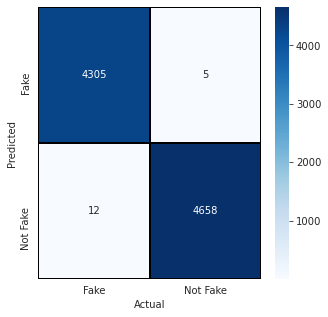

In [15]:
from sklearn import svm
from sklearn.metrics import classification_report

# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')

classifier_linear.fit(tfidf_train, y_train)
prediction_linear = classifier_linear.predict(tfidf_test)

print(f'Accuracy: {round((accuracy_score(y_test, prediction_linear))*100,2)}%')

cm = confusion_matrix(y_test, prediction_linear)

cm=pd.DataFrame(cm,index=['Fake','Not Fake'],columns=['Fake','Not Fake'])


plt.figure(figsize=(5,5))
sns.heatmap(cm,cmap="Blues",linecolor='black',linewidth=1,annot=True,fmt='',xticklabels=['Fake','Not Fake'],yticklabels=['Fake','Not Fake'])
plt.xlabel('Actual')
plt.ylabel('Predicted')


# Building our MultinomialNB Algorithm¶


Accuracy: 95.07%


Text(24.0, 0.5, 'Predicted')

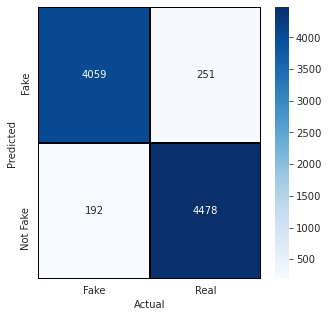

In [16]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB(alpha=0.1)

classifier.fit(tfidf_train, y_train)
pred = classifier.predict(tfidf_test)

print(f'Accuracy: {round((accuracy_score(y_test, pred))*100,2)}%')

cm = confusion_matrix(y_test, pred)

cm=pd.DataFrame(cm,index=['Fake','Real'],columns=['Fake','Real'])


plt.figure(figsize=(5,5))
sns.heatmap(cm,cmap="Blues",linecolor='black',linewidth=1,annot=True,fmt='',xticklabels=['Fake','Real'],yticklabels=['Fake','Not Fake'])
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Passive Aggressive Classifier Algorithm


Accuracy: 99.8%


Text(24.0, 0.5, 'Predicted')

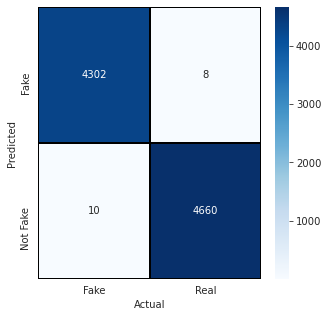

In [17]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

clf = PassiveAggressiveClassifier(max_iter=80)

clf.fit(tfidf_train,y_train)

y_pred=clf.predict(tfidf_test)
print(f'Accuracy: {round((accuracy_score(y_test,y_pred))*100,2)}%')

cm=confusion_matrix(y_test,y_pred)
cm=pd.DataFrame(cm,index=['Fake','Real'],columns=['Fake','Real'])


plt.figure(figsize=(5,5))
sns.heatmap(cm,cmap="Blues",linecolor='black',linewidth=1,annot=True,fmt='',xticklabels=['Fake','Real'],yticklabels=['Fake','Not Fake'])
plt.xlabel('Actual')
plt.ylabel('Predicted')